# Technical Skill Usage Analysis Model 

Developed by: Kudarachchi K.A.N.D

# Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import warnings
import math

from matplotlib import pyplot as plt
from pandas import DataFrame, Series
from math import sqrt
from scipy.spatial import distance

warnings.filterwarnings('ignore')

usage=pd.read_csv("tech_usageV2.csv",sep=",")
usage

,Id,User,Name,Language,value
0,376543369,Navoxya,AF-final,JavaScript,24131
1,376543369,Navoxya,AF-final,HTML,1078
2,376543369,Navoxya,AF-final,CSS,564
3,376376615,Navoxya,AF-paper,JavaScript,19841
4,376376615,Navoxya,AF-paper,HTML,1084
5,376376615,Navoxya,AF-paper,CSS,564
6,376376615,Navoxya,AF-paper,Shell,103
7,382661686,Navoxya,api-ICAF,JavaScript,12760
8,405410677,Navoxya,api-SchoolMS-1,JavaScript,24840
9,397928931,Navoxya,api-shopping-store,JavaScript,15447


# Preprocessor

In [2]:
def multiply_s1(x):
    return x * 100.00



df = pd.DataFrame(usage.groupby('Language')['value'].sum().nlargest(10))
total = df['value'].sum()
print(total)
df['percentage'] = df['value']/total
df.reset_index(level=0, inplace=True)
df['percentage'] = df['percentage'].apply(multiply_s1).round(3)
df['percentagePoints'] = (df['percentage']/100).round(4)
df

4109756


,Language,value,percentage,percentagePoints
0,Dart,2556651,62.209,0.6221
1,JavaScript,587713,14.300,0.1430
2,HTML,307862,7.491,0.0749
3,Java,305356,7.430,0.0743
4,CSS,211029,5.135,0.0514
5,SCSS,133969,3.260,0.0326
6,Less,5937,0.144,0.0014
7,Shell,674,0.016,0.0002
8,Swift,404,0.010,0.0001
9,Ruby,161,0.004,0.0000


In [3]:
allRepo = pd.DataFrame(usage.groupby('Name'))
index = allRepo.index
number_of_repos = len(index)
print(number_of_repos)
rep_point = number_of_repos//10
print("Repos point: {}".format(rep_point))

22
Repos point: 2


In [4]:
df['NewpercentagePoints'] = df['percentagePoints']+rep_point
df


,Language,value,percentage,percentagePoints,NewpercentagePoints
0,Dart,2556651,62.209,0.6221,2.6221
1,JavaScript,587713,14.300,0.1430,2.1430
2,HTML,307862,7.491,0.0749,2.0749
3,Java,305356,7.430,0.0743,2.0743
4,CSS,211029,5.135,0.0514,2.0514
5,SCSS,133969,3.260,0.0326,2.0326
6,Less,5937,0.144,0.0014,2.0014
7,Shell,674,0.016,0.0002,2.0002
8,Swift,404,0.010,0.0001,2.0001
9,Ruby,161,0.004,0.0000,2.0000


In [5]:
# condition_one = df["Language"] == "JavaScript"

# condition_two = df["Language"] == "HTML"

# new_dataframe = df[condition_one & condition_two]

# new_dataframe

mask1 = (df['Language'].isin(['JavaScript']))
mask2 = (df['Language'].isin(['Dart']))
mask3 = (df['Language'].isin(['HTML']))
mask4 = (df['Language'].isin(['CSS']))

filteredL = df[mask1 | mask2 | mask3 | mask4]
filteredL


,Language,value,percentage,percentagePoints,NewpercentagePoints
0,Dart,2556651,62.209,0.6221,2.6221
1,JavaScript,587713,14.300,0.1430,2.1430
2,HTML,307862,7.491,0.0749,2.0749
4,CSS,211029,5.135,0.0514,2.0514


In [6]:
def multiply_s1(x):
    return x * 100.00


total = filteredL['value'].sum()
print(total)
filteredL['Cpercentage'] = filteredL['value']/total
filteredL['Cpercentage'] = filteredL['Cpercentage'].apply(multiply_s1).round(3)
filteredL

3663255


,Language,value,percentage,percentagePoints,NewpercentagePoints,Cpercentage
0,Dart,2556651,62.209,0.6221,2.6221,69.792
1,JavaScript,587713,14.300,0.1430,2.1430,16.043
2,HTML,307862,7.491,0.0749,2.0749,8.404
4,CSS,211029,5.135,0.0514,2.0514,5.761


# Data Visualization

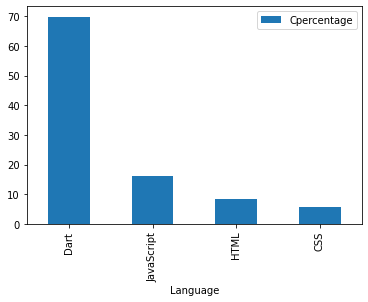

In [7]:
filteredL.plot(
    x = 'Language',
    y = 'Cpercentage',
    kind = 'bar')
plt.show()